## 주식, 코인 시세 예측

### LSTM (Long Short Term Memory)
* 기억(Memory)을 가지고 있는 인공지능 모델
* 이전 데이터를 가지고 이후 데이터를 예측할 때 사용

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [2]:
# OpenDoor의 주가를 Data로 사용
data = pd.read_csv('./OPEN.csv')

In [3]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

print(mid_prices)

[11.1       11.115     11.8625    11.74      11.505     11.26
 11.37      11.715     11.845     11.705     11.605     11.575
 11.525     11.435     11.645     11.7       11.8       11.49
 11.53      11.875     12.01      11.925     12.19      12.12
 11.885     11.935     12.09      11.975     11.775     11.535
 11.085     11.0025    10.9       11.04      11.045     11.01
 11.05      10.99      10.885     10.88      10.995     11.0545
 10.96      10.89      10.875     10.825     10.925     10.85
 10.805     10.675     10.75      10.82      10.825     11.015
 11.1565    11.65      11.905     12.025     12.645     12.63
 12.875     16.45      16.235     15.865     15.16      14.88
 16.1950005 16.28      15.125     16.075     16.8949995 18.2810005
 18.884999  18.665     18.1899995 18.55      17.2975    17.2649995
 18.495     20.9750005 23.435     23.3999995 25.34      25.255
 23.4650005 22.0699995 22.2750005 22.0500005 20.96      19.285
 18.0185005 18.5699995 17.4905005 17.47      16.73500

In [4]:
# 20개의 이전 날짜 Data로 다음날 1개의 데이터를 예측
seq_len = 20
sequence_len = seq_len + 1

# result 한 개의 index에 21개의 데이터를 삽입
result = []
for index in range(len(mid_prices) - sequence_len):
    result.append(mid_prices[index: index + sequence_len])

result[0]

array([11.1   , 11.115 , 11.8625, 11.74  , 11.505 , 11.26  , 11.37  ,
       11.715 , 11.845 , 11.705 , 11.605 , 11.575 , 11.525 , 11.435 ,
       11.645 , 11.7   , 11.8   , 11.49  , 11.53  , 11.875 , 12.01  ])

In [5]:
# 정규화
# 첫째날 기준(0)으로 이후 날들의 값을 비율로 계산 
normalized_data = []
for window in result:
    normalized_window = [ (( float(p) / float(window[0])) - 1) for p in window ]
    normalized_data.append(normalized_window)
    
result2 = np.array(normalized_data)
result2[0]

array([0.        , 0.00135135, 0.06869369, 0.05765766, 0.03648649,
       0.01441441, 0.02432432, 0.05540541, 0.06711712, 0.0545045 ,
       0.0454955 , 0.04279279, 0.03828829, 0.03018018, 0.0490991 ,
       0.05405405, 0.06306306, 0.03513514, 0.03873874, 0.06981982,
       0.08198198])

In [6]:
# 데이터 중 90%만 학습에 사용
row = int(round(result2.shape[0] * 0.9))
train = result2[:row, :]

# 성능을 위해 data를 shuffle
np.random.shuffle(train)

In [7]:
# 90%의 데이터를 학습에 사용
# 1차원 ndarray로 변환
x_train = train[:, :-1]
# 2차원 ndarray로 변환
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

In [8]:
# 10%의 데이터를 테스트에 사용
x_test = result2[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result2[row:, -1]

In [9]:
model = Sequential()

In [10]:
model.add(LSTM(50, return_sequences=True, input_shape=(20, 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation="linear"))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=20)

Epoch 1/20
19/19 [==============================] - 14s 58ms/step - loss: 0.0541 - val_loss: 0.0118
Epoch 2/20
19/19 [==============================] - 0s 9ms/step - loss: 0.0209 - val_loss: 0.0114
Epoch 3/20
19/19 [==============================] - 0s 9ms/step - loss: 0.0169 - val_loss: 0.0143
Epoch 4/20
19/19 [==============================] - 0s 9ms/step - loss: 0.0158 - val_loss: 0.0121
Epoch 5/20
19/19 [==============================] - 0s 9ms/step - loss: 0.0117 - val_loss: 0.0099
Epoch 6/20
19/19 [==============================] - 0s 10ms/step - loss: 0.0110 - val_loss: 0.0141
Epoch 7/20
19/19 [==============================] - 0s 10ms/step - loss: 0.0109 - val_loss: 0.0090
Epoch 8/20
19/19 [==============================] - 0s 9ms/step - loss: 0.0116 - val_loss: 0.0074
Epoch 9/20
19/19 [==============================] - 0s 10ms/step - loss: 0.0105 - val_loss: 0.0073
Epoch 10/20
19/19 [==============================] - 0s 10ms/step - loss: 0.0105 - val_loss: 0.0061
Epoch 11/20
1

In [12]:
pred = model.predict(x_test)
pred

array([[-2.04553902e-01],
       [-2.21411362e-01],
       [-2.54390508e-01],
       [-2.92976499e-01],
       [-3.03647250e-01],
       [-2.49489814e-01],
       [-1.35441214e-01],
       [-1.12578176e-01],
       [-2.83440743e-02],
       [ 1.07234113e-01],
       [ 5.98147884e-02],
       [ 2.53979117e-04],
       [ 8.95367470e-04],
       [-2.45901849e-02],
       [-7.41709322e-02],
       [-2.27170959e-02],
       [-5.79763949e-02],
       [-1.73991416e-02],
       [-6.85166642e-02],
       [-1.38808459e-01],
       [-1.45501643e-01]], dtype=float32)

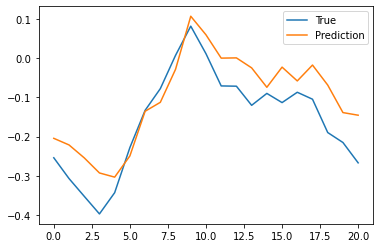

In [13]:
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()